todo: 
- reframe to fix center of mass?
- check dynamical friction implementation
- add checkbox for dynamical friction

In [1]:
%matplotlib inline
from galcrash_utils import *

In [2]:
def initsel(x1=-20, y1=0, vx1=0, vy1=30, phi1=0, theta1=0, m1=1, 
            x2=20, y2=0, vx2=0, vy2=-30, phi2=0, theta2=0, m2=1):

    plt.figure(figsize=(6,6))
    a=plt.subplot(111,aspect='equal')
    #plt.scatter(x1,y1,c='k',s=100*np.sqrt(m1))
    e1 = Ellipse((x1,y1), 30*np.sqrt(m1), 30*np.sqrt(m1)*np.cos(phi1*np.pi/180.), 0.)
    e1.set_clip_box(a.bbox)
    e1.set_color('k')
    a.add_artist(e1)
    plt.quiver(x1,y1,vx1,vy1,color='k',lw=2,angles='xy', scale_units='xy', scale=.5)
    #plt.scatter(x2,y2,c='r',s=100*np.sqrt(m2))
    e2 = Ellipse((x2,y2), 30*np.sqrt(m2), 30*np.sqrt(m2)*np.cos(phi2*np.pi/180.), 0.)
    e2.set_clip_box(a.bbox)
    e2.set_color('r')
    a.add_artist(e2)
    plt.quiver(x2,y2,vx2,vy2,color='r',lw=2,angles='xy', scale_units='xy', scale=.5)
    plt.xlim(-200,200)
    plt.ylim(-200,200)
    plt.xlabel('x [kpc]')
    plt.ylabel('y [kpc]')

w = interactive(initsel, 
                x1=(-200,200), y1=(-200,200), 
                vx1=(-100,100), vy1=(-100,100), 
                phi1=(0,90), theta1=(0,90), 
                m1=(0,5), 
                x2=(-200,200), y2=(-200,200), 
                vx2=(-100,100), vy2=(-100,100), 
                phi2=(0,90), theta2=(0,90), 
                m2=(0,5)
               )
controls = HBox(w.children[:-1], layout = Layout(flex_flow='row wrap'))
output = w.children[-1]
display(VBox([controls, output]))

VkJveChjaGlsZHJlbj0oSEJveChjaGlsZHJlbj0oSW50U2xpZGVyKHZhbHVlPS0yMCwgZGVzY3JpcHRpb249dSd4MScsIG1heD0yMDAsIG1pbj0tMjAwKSwgSW50U2xpZGVyKHZhbHVlPTAsIGTigKY=


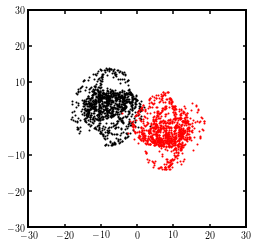

In [4]:
gal1,gal2,s1,s2=simsetup(w.kwargs)

fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable='box')
ax.set_xlim((-30, 30))
ax.set_ylim((-30, 30))

line1, = ax.plot([], [], c='k',marker='o', linestyle='',markersize=1)
line2, = ax.plot([], [], c='r',marker='o', linestyle='',markersize=1)

gal1 = Galaxy(pos=np.array([-20,0,0])/3.5, vel=np.array([0,10,0])/250.)
gal2 = Galaxy(pos=np.array([20,0,0])/3.5, vel=np.array([0,-10,0])/250.)
s1 = Stars(gal1)
s2 = Stars(gal2)


### Step
def tstep(gal1,gal2,s1,s2):
    gal1.acc = gal2.accel(gal1.pos)
    gal2.acc = gal1.accel(gal2.pos)
    if ((gal1.friction==True) or (gal2.friction==True)):
        gal1.acc = gal1.acc + gal2.dynFric(gal1.pos)
        gal2.acc = gal2.acc + gal1.dynFric(gal2.pos)
    s1.acc = gal1.accel(s1.pos) + gal2.accel(s1.pos)
    s2.acc = gal1.accel(s2.pos) + gal2.accel(s2.pos)
    gal1.move()
    gal2.move()
    s1.move()
    s2.move()
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return (line1,line2)
def animate(i):
    tstep(gal1,gal2,s1,s2)
    line1.set_data(s1.pos[:,0]*3.5, s1.pos[:,1]*3.5)
    line2.set_data(s2.pos[:,0]*3.5, s2.pos[:,1]*3.5)
    return (line1,line2)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=20, 
                               blit=True)
HTML(anim.to_html5_video())

In [5]:
print w.kwargs

{'y2': 0, 'vy2': -30, 'vy1': 30, 'theta2': 0, 'x2': 20, 'theta1': 0, 'm1': 1, 'phi2': 0, 'phi1': 80, 'm2': 1, 'y1': 0, 'x1': -20, 'vx1': 0, 'vx2': 0}


In [ ]:
#trial - disk of one galaxy

fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(( -3, 3))
ax.set_ylim((-3, 3))

line, = ax.plot([], [], c='k',marker='o', linestyle='',markersize=1)

gal1 = Galaxy()
s1=Stars(gal1, n=1000)

def tstep(gal1,s1):
    s1.acc = gal1.accel(s1.pos)
    s1.move()
def init():
    line.set_data([], [])
    return (line,)
def animate(i):
    tstep(gal1,s1)
    line.set_data(s1.pos[:,0], s1.pos[:,1])
    return (line,)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, 
                               blit=True)
HTML(anim.to_html5_video())
    

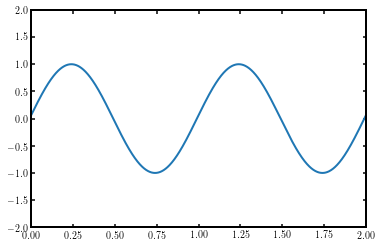

In [6]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)
def init():
    line.set_data([], [])
    return (line,)
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, 
                               blit=True)
HTML(anim.to_html5_video())


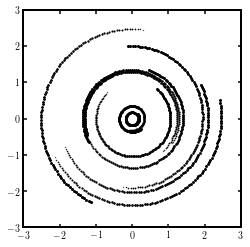

In [507]:
gal1 = Galaxy()
s1=Stars(gal1, n=10)

#print gal1.pos
#print s1.pos
#print s1.pos-gal1.pos
#print np.sqrt(np.sum((s1.pos-gal1.pos)**2,axis=1))

plt.quiver(s1.pos[:,0], s1.pos[:,1],s1.vel[:,0], s1.vel[:,1])

def tstep(gal1,s1):
    s1.acc = gal1.accel(s1.pos)
    s1.move()
    
plt.subplot(111,aspect='equal')
plt.xlim(-3,3)
plt.ylim(-3,3)

for i in np.arange(100):
    plt.plot(s1.pos[:,0], s1.pos[:,1], c='k',marker='o', linestyle='',markersize=np.log10(i+1))
    tstep(gal1,s1)



In [ ]:
#trial - disk of one galaxy

fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(( -3, 3))
ax.set_ylim((-3, 3))

line, = ax.plot([], [], c='k',marker='o', linestyle='',markersize=1)

gal1 = Galaxy()
s1=Stars(gal1, n=1000)

def tstep(gal1,s1):
    s1.acc = gal1.accel(s1.pos)
    s1.move()
def init():
    line.set_data([], [])
    return (line,)
def animate(i):
    tstep(gal1,s1)
    line.set_data(s1.pos[:,0], s1.pos[:,1])
    return (line,)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, 
                               blit=True)
HTML(anim.to_html5_video())
    